<a href="https://colab.research.google.com/github/Sadhana1842/AQI-Prediction-STUDY-2/blob/main/DTR_with_heatmap_with_CV_with_fill_null.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESCRIPTION:

Performing DTR on the dataset using Cross validation.

Inclues selective features based on heatmap.

Outliers were not removed but the null values were filled with the mean of the corresponding column.

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded=files.upload()


Saving AQI_DATASET.csv to AQI_DATASET.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded["AQI_DATASET.csv"]))
print(df)

       City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
0     Delhi  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
1     Delhi  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
2     Delhi  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
3     Delhi  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
4     Delhi  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...     ...         ...     ...     ...    ...    ...     ...     ...    ...   
2004  Delhi  27-06-2020   39.80  155.94  10.88  21.46   22.47   31.43   0.87   
2005  Delhi  28-06-2020   59.52  308.65  12.67  21.60   23.86   29.27   0.94   
2006  Delhi  29-06-2020   44.86  184.12  10.50  21.57   21.94   27.97   0.88   
2007  Delhi  30-06-2020   39.80   91.98   5.99  17.96   15.44   28.48   0.84   
2008  Delhi  01-07-2020   54.01  128.66   6.33  21.05   16.81   29.06   0.97   

        SO2     O3  Benzene  Toluene  X

<Axes: >

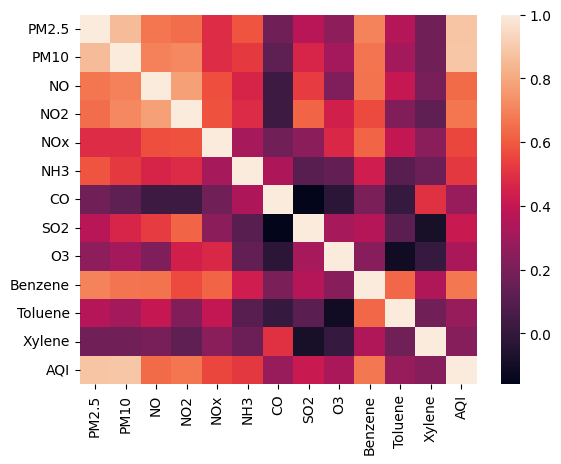

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
df=df.drop(['Xylene','Toluene','Benzene','O3','CO','SO2','NO','NOx','NH3','AQI_Bucket','City','Date'], axis=1)
df

,PM2.5,PM10,NO2,AQI
0,313.22,607.98,36.39,472.0
1,186.18,269.55,32.87,454.0
2,87.18,131.90,30.31,143.0
3,151.84,241.84,36.91,319.0
4,146.60,219.13,34.92,325.0
...,...,...,...,...
2004,39.80,155.94,21.46,112.0
2005,59.52,308.65,21.60,196.0
2006,44.86,184.12,21.57,233.0
2007,39.80,91.98,17.96,114.0


<Axes: >

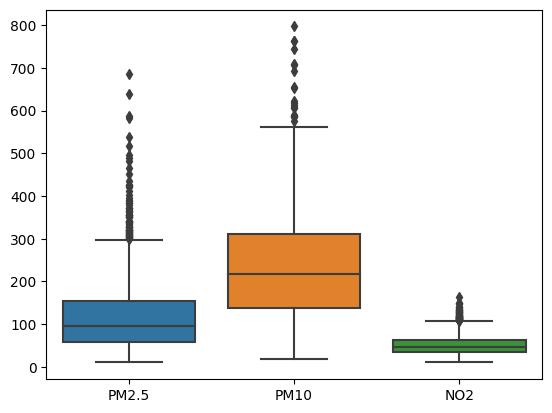

In [ ]:
X= df.drop(['AQI'], axis= 1)
y= df['AQI']
sns.boxplot(data=X)

In [ ]:
for column in X.columns:
  X[column]=X[column].fillna(X[column].mean())
print(X)

       PM2.5    PM10    NO2
0     313.22  607.98  36.39
1     186.18  269.55  32.87
2      87.18  131.90  30.31
3     151.84  241.84  36.91
4     146.60  219.13  34.92
...      ...     ...    ...
2004   39.80  155.94  21.46
2005   59.52  308.65  21.60
2006   44.86  184.12  21.57
2007   39.80   91.98  17.96
2008   54.01  128.66  21.05

[2009 rows x 3 columns]


In [ ]:
y=y.fillna(y.mean())
y

0       472.0
1       454.0
2       143.0
3       319.0
4       325.0
        ...  
2004    112.0
2005    196.0
2006    233.0
2007    114.0
2008    101.0
Name: AQI, Length: 2009, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [ ]:
scaled_X_train = Scaler.fit_transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define Decision Tree Regressor model
model = DecisionTreeRegressor()

# Define parameters for Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross validation
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X, y)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score:  0.7645684701460608
